In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot

Below is the input of the raw data. This is data downloaded directly from the CARB. The cell below also contains some rudimentary code to "drop" or get rid of unneeded columns such as years not covered by this experiment.

In [3]:
df= pd.read_csv("./GHG_California_Emissions/ghg_inventory_by_sector_all_00_18.csv")
df_fix1 = df.loc[:,~df.columns.str.match("Unnamed")].drop(['Sector Level 4','Type of emission', 'IPCC Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 'SectorActivity_code', 'GWP (100-yr AR4)'], axis='columns')
df_fix2 = df_fix1[df_fix1['GHG']=='CO2'].copy()
df_fix2.reset_index(inplace=True, drop=True)
df_fix2.dropna(how= 'all', inplace=True)
df_fix2

,Sector Level 1,Sector Level 2,Sector Level 3,Activity Level 1,Activity Level 2,GHG,2015,2016,2017,2018
0,Agriculture & Forestry,Ag Energy Use,Crop Production,Fuel combustion,Natural gas,CO2,0.548000,0.62300,0.574000,0.638000
1,Agriculture & Forestry,Ag Energy Use,Livestock,Fuel combustion,Natural gas,CO2,0.084600,0.08360,0.086000,0.089400
2,Agriculture & Forestry,Ag Energy Use,Not Specified,Fuel combustion,Distillate,CO2,3.640000,3.20000,2.390000,2.480000
3,Agriculture & Forestry,Ag Energy Use,Not Specified,Fuel combustion,Gasoline,CO2,0.096900,0.04310,0.045300,0.006880
4,Agriculture & Forestry,Ag Energy Use,Not Specified,Fuel combustion,Kerosene,CO2,0.000274,0.00102,0.000223,0.000132
...,...,...,...,...,...,...,...,...,...,...
306,Transportation,Water-borne,Intrastate,Fuel combustion,Distillate,CO2,0.170000,0.17500,0.180000,0.184000
307,Transportation,Water-borne,Intrastate,Fuel combustion,Residual fuel oil,CO2,NaN,NaN,NaN,NaN
308,Transportation,Water-borne,Intrastate,Fuel combustion,Distillate,CO2,0.542000,0.56000,0.580000,0.601000
309,Transportation,Water-borne,Intrastate,Fuel combustion,Residual fuel oil,CO2,NaN,NaN,NaN,NaN


In [4]:
#this cell is for guidance. It parces out the different sectors that I want to measure
categories = df_fix2[['Sector Level 1', 'Sector Level 2']].drop_duplicates()
categories

,Sector Level 1,Sector Level 2
0,Agriculture & Forestry,Ag Energy Use
6,Agriculture & Forestry,Ag Soil Management
8,Commercial,CHP: Commercial
14,Commercial,Communication
18,Commercial,Domestic Utilities
20,Commercial,Education
22,Commercial,Food Services
24,Commercial,Health Care
25,Commercial,Hotels
26,Commercial,National Security


In [5]:
categories['Sector Level 1'].unique()


array(['Agriculture & Forestry', 'Commercial',
       'Electricity Generation (Imports)',
       'Electricity Generation (In State)', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

In [6]:
#This cell I summed up the total emissions for each year to help check my work
df_fix2[['2015', '2016', '2017', '2018']].sum()

2015    369.690031
2016    357.174818
2017    351.751127
2018    352.073059
dtype: float64

In [43]:
#here I have created a table with emissoins separated by sector. You can also see the sums below which I am using to make sure nothing has gone wrong during this process.
df_emissions_by_sector = df_fix2[['Sector Level 1', '2015', '2016', '2017', '2018']].groupby(by='Sector Level 1').sum()
display(df_emissions_by_sector)
df_emissions_by_sector.sum()
transport_emissions = df_emissions_by_sector.loc['Transportation']
transport_emissions

,2015,2016,2017,2018
Sector Level 1,,,,
Agriculture & Forestry,4.547791,4.054093,3.199990,3.359776
Commercial,13.178153,13.894877,13.828477,14.150899
Electricity Generation (Imports),33.761677,26.244289,23.833669,24.485274
Electricity Generation (In State),50.538822,41.942806,38.018446,38.355543
Industrial,81.877887,80.458153,80.338945,80.676467
Residential,23.281300,24.316400,25.033900,24.768900
Transportation,162.504400,166.264200,167.497700,166.276200


2015    162.5044
2016    166.2642
2017    167.4977
2018    166.2762
Name: Transportation, dtype: float64

In [68]:
#Here I am parsing different emissions and assigning them to their apropriate "emissions sector". Once again there are sums to ensure that nothing is wrong.

df_melted_emissions = \
  df_emissions_by_sector.reset_index(drop=False,inplace=False)\
                        .melt(id_vars=['Sector Level 1'],
                              var_name='Year', value_name='Emissions')\
                        .rename(columns={'Sector Level 1': 'Emissions Sector'}, inplace=False)
df_melted_emissions['Year'] = df_melted_emissions['Year'].astype(np.dtype('int64'))
#display(df_melted_emissions)
emissions_by_year_sector = df_melted_emissions.groupby(['Year', 'Emissions Sector']).sum()
display(emissions_by_year_sector)
total_emissions = emissions_by_year_sector.groupby(['Year']).sum().rename(columns={'Emissions':"Total Emissions"}, inplace=False)
total_emissions

Emissions
Year Emissions Sector                             
2015 Agriculture & Forestry               4.547791
     Commercial                          13.178153
     Electricity Generation (Imports)    33.761677
     Electricity Generation (In State)   50.538822
     Industrial                          81.877887
     Residential                         23.281300
     Transportation                     162.504400
2016 Agriculture & Forestry               4.054093
     Commercial                          13.894877
     Electricity Generation (Imports)    26.244289
     Electricity Generation (In State)   41.942806
     Industrial                          80.458153
     Residential                         24.316400
     Transportation                     166.264200
2017 Agriculture & Forestry               3.199990
     Commercial                          13.828477
     Electricity Generation (Imports)    23.833669
     Electricity Generation (In State)   38.018446
     Industrial                          80.338945
     Residential                         25.033900
     Transportation                     167.497700
2018 Agriculture & Forestry               3.359776
     Commercial                          14.150899
     Electricity Generation (Imports)    24.485274
     Electricity Generation (In State)   38.355543
     Industrial                          80.676467
     Residential                         24.768900
     Transportation                     166.276200

,Total Emissions
Year,
2015,369.690031
2016,357.174818
2017,351.751127
2018,352.073059


In [69]:
#here I am loading the allocations categories which I have made by hand.
df_allocations = pd.read_csv("./GHG_California_Emissions/allocations.csv")
df_allocations

,Allocation Category,Emissions Sector,Year,Allocation,True-up
0,Petroleum Refining and Hydrogen Production,Industrial,2018,19292849,900154
1,Crude Petroleum and Natural Gas Extraction,Industrial,2018,9358356,224186
2,"Cement, Lime, Gypsum, and Clay Product Manufac...",Industrial,2018,7696069,399967
3,Fruit and Vegetable Canning,Industrial,2018,504576,34017
4,Other Food Manufacturing,Agriculture & Forestry,2018,715400,222127
...,...,...,...,...,...
66,Legacy Contract Generators,Residential,2015,4595324,4595324
67,Electrical Distribution,Electricity Generation (In State),2015,92228846,0
68,Waste-to-Energy Facilities,Commercial,2015,275547,275547
69,Facilities with Limited Exemption of Emissions...,Residential,2015,237997,237997


In [70]:
grouped_allocations = df_allocations[['Year', 'Emissions Sector', 'Allocation', 'True-up']]\
  .groupby(['Year', 'Emissions Sector']).sum()
grouped_allocations = grouped_allocations/1000000
display(grouped_allocations)
grouped_allocations.groupby(by='Year').sum()

Allocation   True-up
Year Emissions Sector                                       
2015 Agriculture & Forestry               1.073357  0.226078
     Commercial                          48.256434  2.007247
     Electricity Generation (In State)   92.228846  0.000000
     Industrial                          54.754080  4.386543
     Residential                          5.015820  4.970786
2016 Agriculture & Forestry               1.051534  0.172158
     Commercial                          45.638300  0.262352
     Electricity Generation (In State)   90.450339  0.000000
     Industrial                          54.700011  4.044370
     Residential                          1.120483  0.302753
2017 Agriculture & Forestry               0.868306  0.036929
     Commercial                          44.748077  0.264661
     Electricity Generation (In State)   88.633743  0.000000
     Industrial                          49.600475  2.960436
     Residential                          0.430328  0.024654
2018 Agriculture & Forestry               0.939960  0.226251
     Commercial                          43.909944  0.349031
     Electricity Generation (In State)   86.777303  0.000000
     Industrial                          40.654571  1.721119
     Residential                          0.042323  0.000000

,Allocation,True-up
Year,,
2015,201.328537,11.590654
2016,192.960667,4.781633
2017,184.280929,3.286680
2018,172.324101,2.296401


In [71]:
#Here I have joined the two data sets so that I can begin to perform data analysis
from IPython.display import display
df_joined = grouped_allocations.join(emissions_by_year_sector)
df_joined['Final Allocation'] = df_joined['Allocation']+df_joined['True-up']
df_joined['difference']=df_joined['Emissions'] - df_joined['Allocation']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_joined)

Allocation   True-up  Emissions  \
Year Emissions Sector                                                     
2015 Agriculture & Forestry               1.073357  0.226078   4.547791   
     Commercial                          48.256434  2.007247  13.178153   
     Electricity Generation (In State)   92.228846  0.000000  50.538822   
     Industrial                          54.754080  4.386543  81.877887   
     Residential                          5.015820  4.970786  23.281300   
2016 Agriculture & Forestry               1.051534  0.172158   4.054093   
     Commercial                          45.638300  0.262352  13.894877   
     Electricity Generation (In State)   90.450339  0.000000  41.942806   
     Industrial                          54.700011  4.044370  80.458153   
     Residential                          1.120483  0.302753  24.316400   
2017 Agriculture & Forestry               0.868306  0.036929   3.199990   
     Commercial                          44.748077  0.264661  13.828477   
     Electricity Generation (In State)   88.633743  0.000000  38.018446   
     Industrial                          49.600475  2.960436  80.338945   
     Residential                          0.430328  0.024654  25.033900   
2018 Agriculture & Forestry               0.939960  0.226251   3.359776   
     Commercial                          43.909944  0.349031  14.150899   
     Electricity Generation (In State)   86.777303  0.000000  38.355543   
     Industrial                          40.654571  1.721119  80.676467   
     Residential                          0.042323  0.000000  24.768900   

                                        Final Allocation  difference  
Year Emissions Sector                                                 
2015 Agriculture & Forestry                     1.299435    3.474434  
     Commercial                                50.263681  -35.078281  
     Electricity Generation (In State)         92.228846  -41.690024  
     Industrial                                59.140623   27.123807  
     Residential                                9.986606   18.265480  
2016 Agriculture & Forestry                     1.223692    3.002559  
     Commercial                                45.900652  -31.743423  
     Electricity Generation (In State)         90.450339  -48.507533  
     Industrial                                58.744381   25.758142  
     Residential                                1.423236   23.195917  
2017 Agriculture & Forestry                     0.905235    2.331684  
     Commercial                                45.012738  -30.919600  
     Electricity Generation (In State)         88.633743  -50.615297  
     Industrial                                52.560911   30.738470  
     Residential                                0.454982   24.603572  
2018 Agriculture & Forestry                     1.166211    2.419816  
     Commercial                                44.258975  -29.759045  
     Electricity Generation (In State)         86.777303  -48.421760  
     Industrial                                42.375690   40.021896  
     Residential                                0.042323   24.726577

In [72]:
sums_by_year = df_joined.groupby(by='Year').sum()
sums_by_year['pct_difference']= 100*sums_by_year['difference']/sums_by_year['Emissions']
sums_by_year

,Allocation,True-up,Emissions,Final Allocation,difference,pct_difference
Year,,,,,,
2015,201.328537,11.590654,173.423954,212.919191,-27.904583,-16.090386
2016,192.960667,4.781633,164.666328,197.742300,-28.294339,-17.182832
2017,184.280929,3.286680,160.419758,187.567609,-23.861171,-14.874210
2018,172.324101,2.296401,161.311585,174.620502,-11.012516,-6.826860


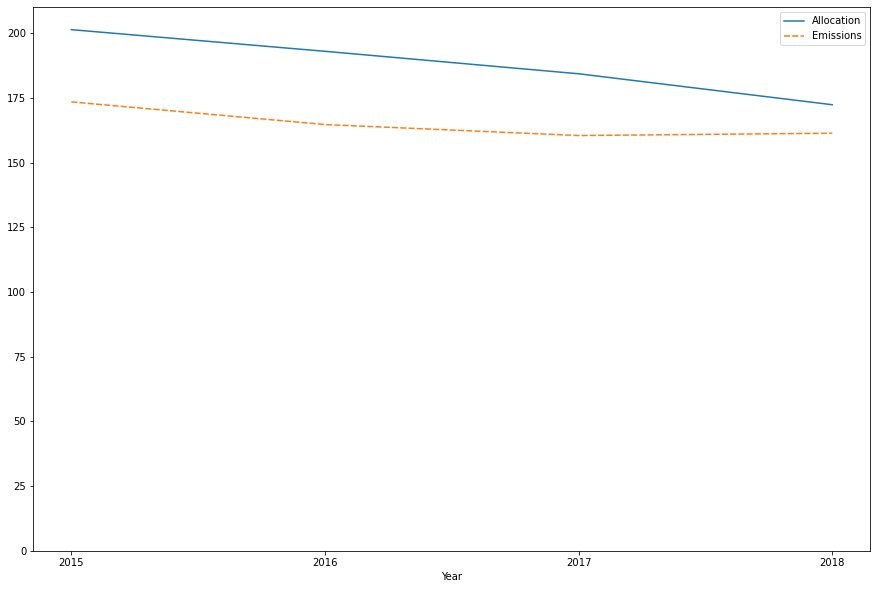

In [73]:
#Here is a lineplot to help visualize the total allocations versus emissions
size = (15,10)
fig, ax = pyplot.subplots(figsize=size);
sns.lineplot(ax=ax, data = sums_by_year[['Allocation', 'Emissions']]);
ax.set_ylim(0, 210);
ax.set_xticks([2015,2016,2017,2018]);

,Year,Type,value
0,2015,Allocation,201.328537
1,2016,Allocation,192.960667
2,2017,Allocation,184.280929
3,2018,Allocation,172.324101
4,2015,Emissions,173.423954
5,2016,Emissions,164.666328
6,2017,Emissions,160.419758
7,2018,Emissions,161.311585


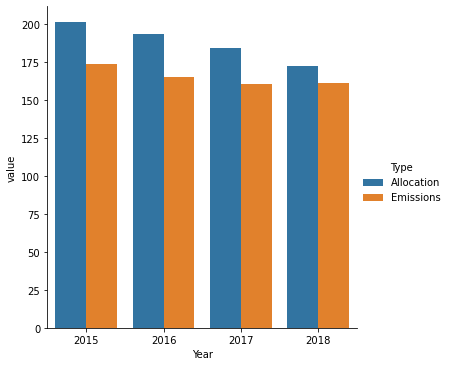

In [74]:
#another plot to help visualize things
#size = (15,10)
#fig, ax = pyplot.subplots(figsize=size);
bar_data = sums_by_year[['Allocation', 'Emissions']].reset_index(drop=False).melt(id_vars=['Year'], var_name='Type')
display(bar_data)
sns.catplot(data = bar_data, kind='bar', x='Year', y='value', hue='Type');


In [75]:
actual_alloctation = df_joined['Allocation'] - df_joined['True-up']

In [76]:
df_joined.insert(5, 'Actual Allocation', actual_alloctation)
df_joined.head()

Allocation   True-up  Emissions  \
Year Emissions Sector                                                     
2015 Agriculture & Forestry               1.073357  0.226078   4.547791   
     Commercial                          48.256434  2.007247  13.178153   
     Electricity Generation (In State)   92.228846  0.000000  50.538822   
     Industrial                          54.754080  4.386543  81.877887   
     Residential                          5.015820  4.970786  23.281300   

                                        Final Allocation  difference  \
Year Emissions Sector                                                  
2015 Agriculture & Forestry                     1.299435    3.474434   
     Commercial                                50.263681  -35.078281   
     Electricity Generation (In State)         92.228846  -41.690024   
     Industrial                                59.140623   27.123807   
     Residential                                9.986606   18.265480   

                                        Actual Allocation  
Year Emissions Sector                                      
2015 Agriculture & Forestry                      0.847279  
     Commercial                                 46.249187  
     Electricity Generation (In State)          92.228846  
     Industrial                                 50.367537  
     Residential                                 0.045034

In [77]:
missing_emissions = df_joined['Emissions'] - df_joined['Actual Allocation']

In [78]:
df_joined.insert(6, 'Missing Emission', missing_emissions)
df_joined

Allocation   True-up  Emissions  \
Year Emissions Sector                                                     
2015 Agriculture & Forestry               1.073357  0.226078   4.547791   
     Commercial                          48.256434  2.007247  13.178153   
     Electricity Generation (In State)   92.228846  0.000000  50.538822   
     Industrial                          54.754080  4.386543  81.877887   
     Residential                          5.015820  4.970786  23.281300   
2016 Agriculture & Forestry               1.051534  0.172158   4.054093   
     Commercial                          45.638300  0.262352  13.894877   
     Electricity Generation (In State)   90.450339  0.000000  41.942806   
     Industrial                          54.700011  4.044370  80.458153   
     Residential                          1.120483  0.302753  24.316400   
2017 Agriculture & Forestry               0.868306  0.036929   3.199990   
     Commercial                          44.748077  0.264661  13.828477   
     Electricity Generation (In State)   88.633743  0.000000  38.018446   
     Industrial                          49.600475  2.960436  80.338945   
     Residential                          0.430328  0.024654  25.033900   
2018 Agriculture & Forestry               0.939960  0.226251   3.359776   
     Commercial                          43.909944  0.349031  14.150899   
     Electricity Generation (In State)   86.777303  0.000000  38.355543   
     Industrial                          40.654571  1.721119  80.676467   
     Residential                          0.042323  0.000000  24.768900   

                                        Final Allocation  difference  \
Year Emissions Sector                                                  
2015 Agriculture & Forestry                     1.299435    3.474434   
     Commercial                                50.263681  -35.078281   
     Electricity Generation (In State)         92.228846  -41.690024   
     Industrial                                59.140623   27.123807   
     Residential                                9.986606   18.265480   
2016 Agriculture & Forestry                     1.223692    3.002559   
     Commercial                                45.900652  -31.743423   
     Electricity Generation (In State)         90.450339  -48.507533   
     Industrial                                58.744381   25.758142   
     Residential                                1.423236   23.195917   
2017 Agriculture & Forestry                     0.905235    2.331684   
     Commercial                                45.012738  -30.919600   
     Electricity Generation (In State)         88.633743  -50.615297   
     Industrial                                52.560911   30.738470   
     Residential                                0.454982   24.603572   
2018 Agriculture & Forestry                     1.166211    2.419816   
     Commercial                                44.258975  -29.759045   
     Electricity Generation (In State)         86.777303  -48.421760   
     Industrial                                42.375690   40.021896   
     Residential                                0.042323   24.726577   

                                        Actual Allocation  Missing Emission  
Year Emissions Sector                                                        
2015 Agriculture & Forestry                      0.847279          3.700512  
     Commercial                                 46.249187        -33.071034  
     Electricity Generation (In State)          92.228846        -41.690024  
     Industrial                                 50.367537         31.510350  
     Residential                                 0.045034         23.236266  
2016 Agriculture & Forestry                      0.879376          3.174717  
     Commercial                                 45.375948        -31.481071  
     Electricity Generation (In State)          90.450339        -48.507533  
     Industrial         

<AxesSubplot:xlabel='Year', ylabel='Emissions'>

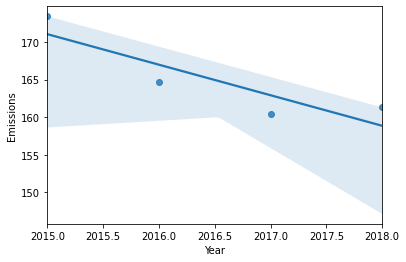

In [79]:
sns.regplot(data = sums_by_year.reset_index(inplace=False, drop=False), x='Year', y = "Emissions")

In [107]:
df_yearly = df_joined.groupby('Year').sum()
df_yearly['Pricing'] = pd.Series([12.21, 12.73, 13.57, 14.61], index=[2015,2016,2017,2018])
df_yearly

,Allocation,True-up,Emissions,Final Allocation,difference,Actual Allocation,Missing Emission,Pricing
Year,,,,,,,,
2015,201.328537,11.590654,173.423954,212.919191,-27.904583,189.737883,-16.313929,12.21
2016,192.960667,4.781633,164.666328,197.742300,-28.294339,188.179034,-23.512706,12.73
2017,184.280929,3.286680,160.419758,187.567609,-23.861171,180.994249,-20.574491,13.57
2018,172.324101,2.296401,161.311585,174.620502,-11.012516,170.027700,-8.716115,14.61


In [120]:
# table for the slide deck
df_computed = pd.DataFrame({'Total Emissions':total_emissions['Total Emissions'], 
                            'CT Emissions':df_yearly['Emissions'],
                           'Allocation':df_yearly['Allocation'], 'Pricing':df_yearly['Pricing']})
df_computed

,Total Emissions,CT Emissions,Allocation,Pricing
Year,,,,
2015,369.690031,173.423954,201.328537,12.21
2016,357.174818,164.666328,192.960667,12.73
2017,351.751127,160.419758,184.280929,13.57
2018,352.073059,161.311585,172.324101,14.61


<AxesSubplot:xlabel='Year', ylabel='Missing Emission'>

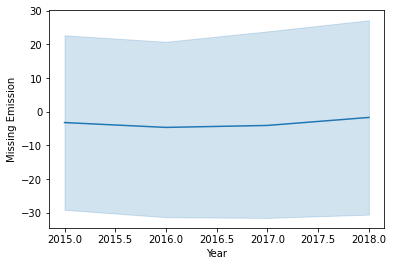

In [121]:
sns.lineplot(data = df_joined, x= 'Year',y = 'Missing Emission')

In [138]:
from scipy import stats

# https://stackoverflow.com/questions/53100393/how-to-get-slope-from-timeseries-data-in-pandas
def predict(series):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(series)), series.values.reshape(-1))
    offsets = []
    predictions = []
    for idx in range(8):
        offset = 4 + idx
        offsets.append(offsets)
        predictions.append(slope*offset+intercept)
    return pd.Series(predictions, index=[2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026])

predicted_total_emissions = predict(total_emissions)
predicted_ct_emissions = predict(df_yearly['Emissions'])
predicted_allocations = predict(df_yearly['Allocation'])
# pricing is in $ per allocation

predicted_pricing = predict(df_yearly['Pricing'])
predictions = pd.DataFrame({'Total Emissions':predicted_total_emissions, 'CT Emissions':predicted_ct_emissions,
                            'Allocation':predicted_allocations, 'Pricing':predicted_pricing})
predictions


,Total Emissions,CT Emissions,Allocation,Pricing
2019,343.103608,154.809487,163.800297,15.290
2020,337.276147,150.751119,154.230992,16.094
2021,331.448687,146.692752,144.661688,16.898
2022,325.621226,142.634384,135.092383,17.702
2023,319.793766,138.576016,125.523079,18.506
2024,313.966305,134.517649,115.953774,19.310
2025,308.138845,130.459281,106.384469,20.114
2026,302.311384,126.400914,96.815165,20.918


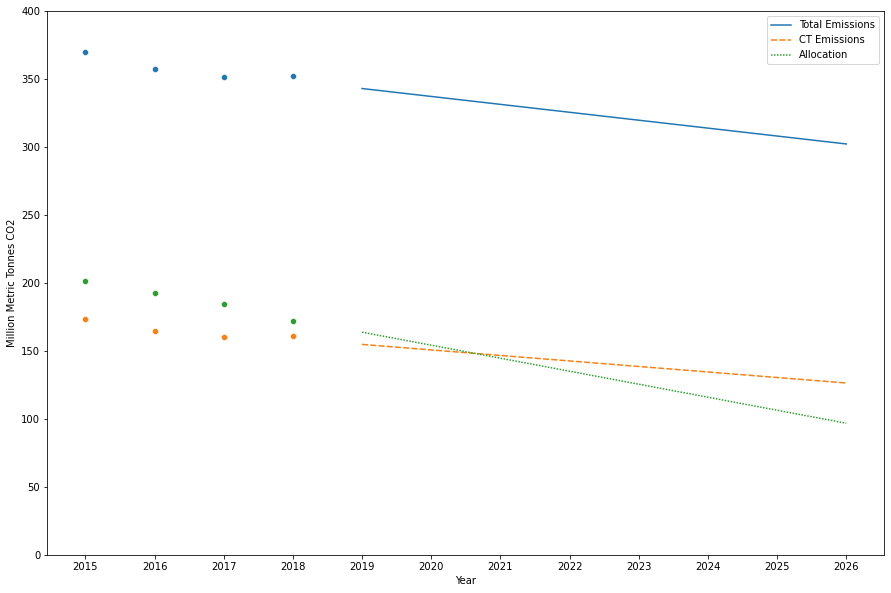

In [139]:
size = (15,10)
fig, ax = pyplot.subplots(figsize=size);
sns.lineplot(ax=ax, data = predictions[['Total Emissions', 'CT Emissions', 'Allocation']]);
sns.scatterplot(ax=ax, data=df_computed['Total Emissions'])
sns.scatterplot(ax=ax, data=df_computed['CT Emissions'])
sns.scatterplot(ax=ax, data=df_computed['Allocation'])
ax.set_ylim(0, 400);
ax.set_xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026]);
ax.set_ylabel("Million Metric Tonnes CO2");

Reduced Commute Emission Savings Formula: 
reduced emissions
  = Total Emissions * percentage of vehicles that are cars * percentage of commute miles * assumed reduction
  = Total Emissions*0.28*0.3*0.2


In [142]:
def commute_savings_fn(emissions):
    return emissions*0.28*0.3*0.2

commute_savings_list = []
for (year, emissions) in predictions['Total Emissions'].iteritems():
    if year<2022:
        commute_savings_list.append(0.0)
    else:
        commute_savings_list.append(commute_savings_fn(emissions))
commute_savings = pd.Series(commute_savings_list, index=[2019,2020,2021,2022,2023,2024,2025,2026])
commute_savings

2019    0.000000
2020    0.000000
2021    0.000000
2022    5.470437
2023    5.372535
2024    5.274634
2025    5.176733
2026    5.078831
dtype: float64

Megawatt hours generated in 2015 * 18% efficiency * metric tonnes of CO2 saved =1.7 million metric tonnes
29,705,160*.18*0.318 = 1,700,323
total_new



In [157]:
total_solar=29705160/1000000
total_savings_in_2015 = total_solar*0.18*0.318
GROWTH_RATE=0.1
print(f"Total solar reduction in 2015: {total_savings_in_2015} M mT CO2")
def solar_reduction(years_in):
    #return years_in*total_solar*0.18*0.318*.2/5
    return total_savings_in_2015*((1+GROWTH_RATE)**years_in)-total_savings_in_2015

solar_savings_list = []
for (year, emissions) in predictions['Total Emissions'].iteritems():
    if year<2022:
        solar_savings_list.append(0.0)
    else:
        solar_savings_list.append(solar_reduction(years_in=year-2021))
solar_savings = pd.Series(solar_savings_list, index=[2019,2020,2021,2022,2023,2024,2025,2026])
solar_savings

Total solar reduction in 2015: 1.7003233584 M mT CO2


2019    0.000000
2020    0.000000
2021    0.000000
2022    0.170032
2023    0.357068
2024    0.562807
2025    0.789120
2026    1.038064
dtype: float64

pounds of CO2 emissions saved by EV((11435*.91)+(6258*0.07)+(4676*0.02))-2182 = 8755.43
8800 lbs of CO2 = 4 mT of CO2 per car
Total EVs converting per year 100000
1st year is 400000mT
2nd year is 800000mT
3rd year is 1200000mT
4th year is 1600000mT
5th year is 2000000mT


In [159]:
ev_savings_list = [0,0,0,0.4,0.8,1.2,1.6,2]
ev_savings = pd.Series(ev_savings_list, index = [2019,2020,2021,2022,2023,2024,2025,2026])
ev_savings

2019    0.0
2020    0.0
2021    0.0
2022    0.4
2023    0.8
2024    1.2
2025    1.6
2026    2.0
dtype: float64

In [173]:
df_commute_savings = pd.DataFrame(commute_savings, columns=['Commute Savings'])
df_solar_savings =pd.DataFrame(solar_savings, columns = ['Solar Savings'])
df_ev_savings = pd.DataFrame(ev_savings, columns = ['EV Savings'])

In [187]:
total_savings = commute_savings+solar_savings+ev_savings
PAYOUT_FACTOR=15
consumer_payouts = total_savings*predictions['Pricing']*PAYOUT_FACTOR
total_allocation_in = predictions['CT Emissions']*predictions['Pricing']
reduction = pd.DataFrame({'Commute Savings': commute_savings,
                          'Solar Savings':solar_savings,
                          'EV Savings': ev_savings,
                          'Total Savings':total_savings,
                          '% Savings':round(100*total_savings/predictions['Total Emissions'],1),
                          'Consumer Payouts in M$':consumer_payouts.round(),
                          '% of industrial payments':round(100*consumer_payouts/total_allocation_in,1)})
reduction

,Commute Savings,Solar Savings,EV Savings,Total Savings,% Savings,Consumer Payouts in M$,% of industrial payments
2019,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2020,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2021,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2022,5.470437,0.170032,0.4,6.040469,1.9,1604.0,63.5
2023,5.372535,0.357068,0.8,6.529603,2.0,1813.0,70.7
2024,5.274634,0.562807,1.2,7.037441,2.2,2038.0,78.5
2025,5.176733,0.789120,1.6,7.565853,2.5,2283.0,87.0
2026,5.078831,1.038064,2.0,8.116896,2.7,2547.0,96.3


In [188]:
final_predictions = pd.DataFrame({'CT System':predictions['Total Emissions'],
                                  'Proposed System':predictions['Total Emissions']-reduction['Total Savings']})
final_predictions

,CT System,Proposed System
2019,343.103608,343.103608
2020,337.276147,337.276147
2021,331.448687,331.448687
2022,325.621226,319.580757
2023,319.793766,313.264163
2024,313.966305,306.928864
2025,308.138845,300.572992
2026,302.311384,294.194489


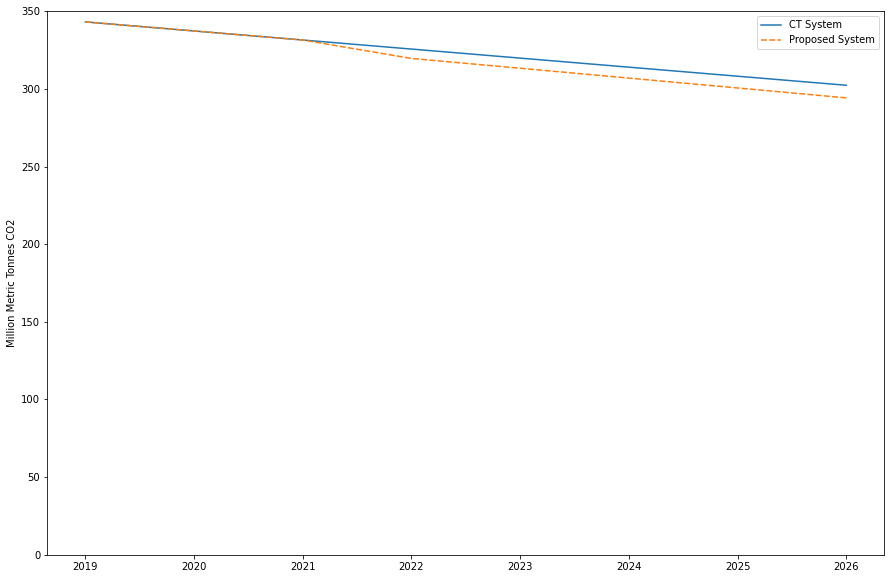

In [195]:
size = (15,10)
fig, ax = pyplot.subplots(figsize=size);
ax.set_ylim(0, 350);
sns.lineplot(ax=ax, data = final_predictions[['CT System', 'Proposed System']]);
ax.set_ylabel("Million Metric Tonnes CO2");

In [201]:
mean_pricing = predictions.loc[[2022,2023,2024,2025,2026]]['Pricing'].mean()
mean_pricing

19.310000000000002

In [206]:
emissions_per_car_per_year = ((11435*(1-0.069-0.019-0.062))+(6258*0.069)+(4676*0.019)+(2182*.062))/2204.6
print(f"Emissions per car per year = {emissions_per_car_per_year} mT CO2")
payout_for_car = round(mean_pricing*PAYOUT_FACTOR*emissions_per_car_per_year*0.3, 0)
print(f"Payout for a car per year of not commuting: {payout_for_car}")

Emissions per car per year = 4.706377574163114 mT CO2
Payout for a car per year of not commuting: 409.0


In [211]:
# for solar panal
# capacity * time * 18% * 0.318 mTCO2/MWh
metric_tons_saved = 6.2/1000*365*24*0.18*0.318
print(f"Metric tons saved: {metric_tons_saved}")
payout_for_solar_panel = round(mean_pricing*PAYOUT_FACTOR*metric_tons_saved,0)
print(f"Yearly payout for a solar panel: {payout_for_solar_panel}")

Metric tons saved: 3.10881888
Yearly payout for a solar panel: 900.0


In [212]:
payout_for_ev = 4 * mean_pricing * PAYOUT_FACTOR
payout_for_ev

1158.6000000000001